In [1]:
import numpy as np
import pandas as pd
import math
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# import k means methods
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics import silhouette_score

#import elbow method algorithm
from kneed import KneeLocator

In [2]:
df = pd.read_csv("abalone.csv")
df.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
print("Presence of null values: " + str(df.isnull().values.any()))

Presence of null values: False


In [4]:
lbl = LabelEncoder()
df['sex'] = lbl.fit_transform(df['sex'])
keys = lbl.classes_
values = lbl.transform(lbl.classes_)
mapping = dict()
dictionary = dict(zip(keys, values))
print(dictionary)

{'F': 0, 'I': 1, 'M': 2}


<AxesSubplot:>

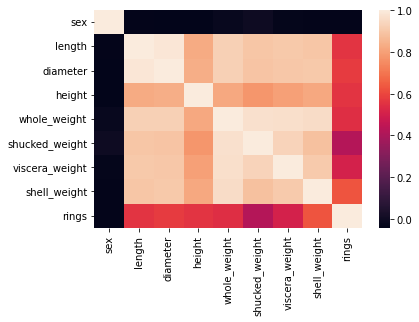

In [5]:
import seaborn as sns 

corr = df.corr()
sns.heatmap(corr)

<AxesSubplot:>

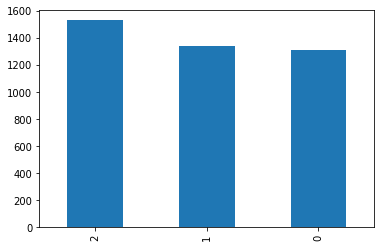

In [6]:
pd.value_counts(df['sex']).plot.bar()

<AxesSubplot:>

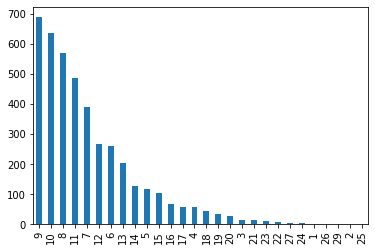

In [7]:
pd.value_counts(df['rings']).plot.bar()

<AxesSubplot:xlabel='sex', ylabel='diameter'>

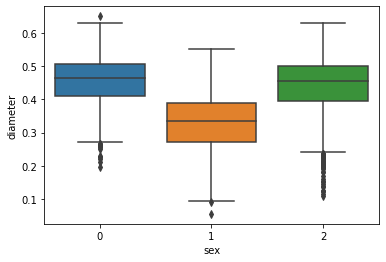

In [8]:
sns.boxplot(x = 'sex', y = 'diameter', data = df)

<AxesSubplot:xlabel='sex', ylabel='shucked_weight'>

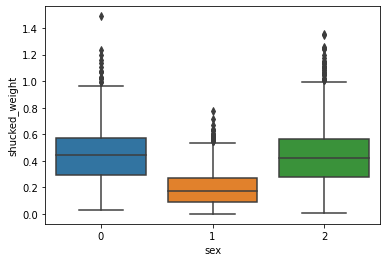

In [9]:
sns.boxplot(x = 'sex', y = 'shucked_weight', data = df)

In [10]:
males = df[df['sex'] == 2]
females = df[df['sex'] == 0]
infants = df[df['sex'] == 1]

quantile_male = males['shucked_weight'].quantile(0.90)
quantile_female = females['shucked_weight'].quantile(0.90)
quantile_infant = infants['shucked_weight'].quantile(0.90)

males[males['shucked_weight'] < quantile_male]
females[females['shucked_weight'] < quantile_female]
infants[infants['shucked_weight'] < quantile_infant]

frames = [males, females, infants]
df = pd.concat(frames)
print(len(df.index))

4177


<AxesSubplot:xlabel='sex', ylabel='shucked_weight'>

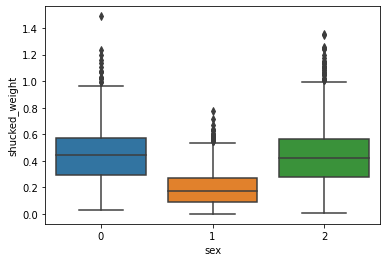

In [11]:
sns.boxplot(x = 'sex', y = 'shucked_weight', data = df)

CPU times: total: 141 ms
Wall time: 75.1 ms
CPU times: total: 250 ms
Wall time: 51.2 ms
CPU times: total: 406 ms
Wall time: 89 ms
CPU times: total: 469 ms
Wall time: 74.9 ms
CPU times: total: 641 ms
Wall time: 80 ms
CPU times: total: 562 ms
Wall time: 80.4 ms
CPU times: total: 516 ms
Wall time: 82.3 ms
CPU times: total: 625 ms
Wall time: 92.3 ms

Number of clusters: 4


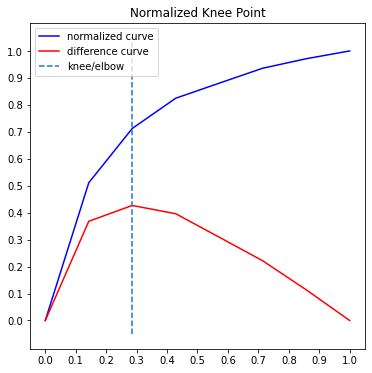

In [12]:
# hold error value for elbow method calculation
error = []


for i in range(2, 10):
    kmeans = KMeans(n_clusters = i)
    %time kmeans.fit(df)
    error.append(kmeans.inertia_)

# find the elbow of the graph using kneed package   
optimalK = KneeLocator(
    range(2, 10),
    error,
    curve = 'convex',
    direction = 'decreasing',
    interp_method = 'interp1d',
)

# print number of clusters for dataset
print("\nNumber of clusters: " + str(optimalK.elbow))
optimalK.plot_knee_normalized()

# create optimal K graph for prediction model 
kmeans = KMeans(n_clusters = optimalK.elbow)

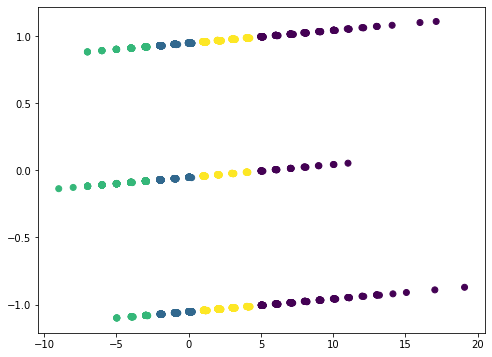

In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components = 2)
new_df = pca.fit_transform(df)
model = KMeans(n_clusters = optimalK.elbow).fit(new_df)

plt.figure(figsize=(8, 6))
plt.scatter(new_df[:,0], new_df[:,1], c=model.labels_.astype(float))

CPU times: total: 78.1 ms
Wall time: 86.2 ms
CPU times: total: 203 ms
Wall time: 38.4 ms
CPU times: total: 219 ms
Wall time: 44.5 ms
CPU times: total: 188 ms
Wall time: 47.5 ms
CPU times: total: 266 ms
Wall time: 54.9 ms
CPU times: total: 500 ms
Wall time: 58.6 ms
CPU times: total: 234 ms
Wall time: 65 ms
CPU times: total: 469 ms
Wall time: 74 ms

Number of clusters: 2


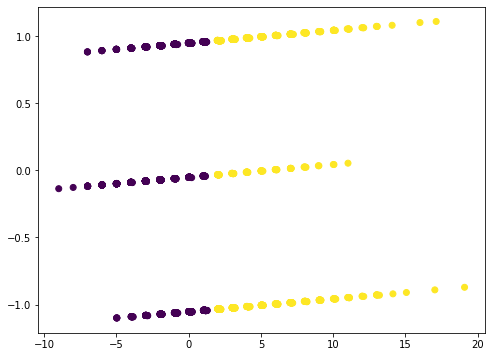

In [14]:
silhouette_vals = dict()
optimalK = 0

for i in range(2, 10):
    kmeans = KMeans(n_clusters = i)
    %time cluster_labels = kmeans.fit_predict(df)
    silhouette_vals[i] = silhouette_score(df, cluster_labels)

silhouette_optimalK = max(silhouette_vals, key=silhouette_vals.get)
print("\nNumber of clusters: " + str(silhouette_optimalK))

pca = PCA(n_components = 2)
new_df = pca.fit_transform(df)
model = KMeans(n_clusters = silhouette_optimalK).fit(new_df)

plt.figure(figsize=(8, 6))
plt.scatter(new_df[:,0], new_df[:,1], c=model.labels_.astype(float))

In [19]:
# error contains error value for each value of k
optimalK = 0
silhouette_vals = dict()

# iterate through possible k values to set up optimization graph
for i in range(2, 10):
    sc = SpectralClustering(i)
    %time spectral_cluster_labels = sc.fit_predict(df)
    silhouette_vals[i] = silhouette_score(df, spectral_cluster_labels)
    
silhouette_optimalK = max(silhouette_vals, key=silhouette_vals.get)
print("\nNumber of clusters: " + str(silhouette_optimalK))

CPU times: total: 15.2 s
Wall time: 5.12 s
CPU times: total: 17.3 s
Wall time: 5.93 s
CPU times: total: 14.1 s
Wall time: 5.36 s
CPU times: total: 15.5 s
Wall time: 5.26 s
CPU times: total: 14.8 s
Wall time: 5.36 s
CPU times: total: 15.8 s
Wall time: 5.28 s
CPU times: total: 15.1 s
Wall time: 5.37 s
CPU times: total: 15.7 s
Wall time: 5.18 s

Number of clusters: 2


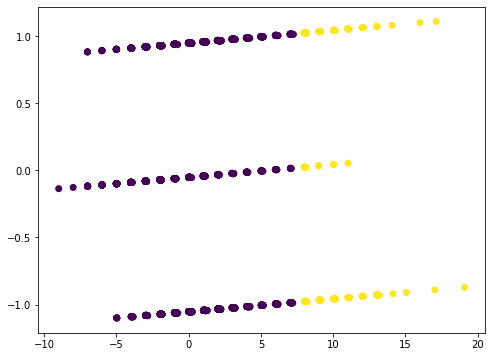

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
new_df = pca.fit_transform(df)
model = SpectralClustering(silhouette_optimalK).fit_predict(new_df)

plt.figure(figsize=(8, 6))
plt.scatter(new_df[:,0], new_df[:,1], c=model.astype(float))